In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from matplotlib import pyplot as plt

In [2]:
# We import the dataset
dataset = pd.read_excel("./Arboles de Decisión - Tabla Hipotecas - II.xlsx")

In [3]:
# We check dataset first
dataset

,Pareja,Propiedades,Trabaja,Crédito,Concedido
0,False,True,True,156000,True
1,True,False,False,3000,True
2,False,True,False,45000,True
3,False,False,True,115000,False
4,True,False,False,215000,False
5,False,True,True,60500,True
6,False,False,False,120400,False
7,True,True,True,94000,True
8,True,True,False,124000,True
9,False,False,False,3950,False


In [4]:
# We check correlation between variables
dataset.corr()

,Pareja,Propiedades,Trabaja,Crédito,Concedido
Pareja,1.000000,-0.168790,0.182574,0.135363,0.427618
Propiedades,-0.168790,1.000000,0.277350,0.092033,0.424043
Trabaja,0.182574,0.277350,1.000000,0.125659,0.487950
Crédito,0.135363,0.092033,0.125659,1.000000,-0.273451
Concedido,0.427618,0.424043,0.487950,-0.273451,1.000000


In [5]:
# First we choose our variable target: Concedido
# we store it appart from the rest of the variables

x_dataset = dataset.iloc[:,0:4]
y_dataset = dataset.iloc[:,4]

In [6]:
y_dataset

0      True
1      True
2      True
3     False
4     False
5      True
6     False
7      True
8      True
9     False
10     True
11     True
12     True
13    False
14     True
15     True
16     True
17    False
18     True
19     True
20    False
21     True
Name: Concedido, dtype: bool

In [7]:
x_dataset

,Pareja,Propiedades,Trabaja,Crédito
0,False,True,True,156000
1,True,False,False,3000
2,False,True,False,45000
3,False,False,True,115000
4,True,False,False,215000
5,False,True,True,60500
6,False,False,False,120400
7,True,True,True,94000
8,True,True,False,124000
9,False,False,False,3950


In [8]:
# We have a look to our data, a simple view reveals no high correlation between variables
x_dataset.corr()

,Pareja,Propiedades,Trabaja,Crédito
Pareja,1.000000,-0.168790,0.182574,0.135363
Propiedades,-0.168790,1.000000,0.277350,0.092033
Trabaja,0.182574,0.277350,1.000000,0.125659
Crédito,0.135363,0.092033,0.125659,1.000000


In [9]:
dt = DecisionTreeClassifier(criterion="entropy")
dt = dt.fit(x_dataset, y_dataset)

[Text(535.6800000000001, 489.24, 'Trabaja <= 0.5\nentropy = 0.9\nsamples = 100.0%\nvalue = [0.32, 0.68]\nclass = y[1]'),
 Text(357.12, 380.52000000000004, 'Crédito <= 133500.0\nentropy = 0.99\nsamples = 50.0%\nvalue = [0.55, 0.45]\nclass = y[0]'),
 Text(267.84000000000003, 271.8, 'Propiedades <= 0.5\nentropy = 0.95\nsamples = 36.4%\nvalue = [0.38, 0.62]\nclass = y[1]'),
 Text(178.56, 163.08000000000004, 'Pareja <= 0.5\nentropy = 0.97\nsamples = 22.7%\nvalue = [0.6, 0.4]\nclass = y[0]'),
 Text(89.28, 54.360000000000014, 'entropy = 0.0\nsamples = 13.6%\nvalue = [1.0, 0.0]\nclass = y[0]'),
 Text(267.84000000000003, 54.360000000000014, 'entropy = 0.0\nsamples = 9.1%\nvalue = [0.0, 1.0]\nclass = y[1]'),
 Text(357.12, 163.08000000000004, 'entropy = 0.0\nsamples = 13.6%\nvalue = [0.0, 1.0]\nclass = y[1]'),
 Text(446.4, 271.8, 'entropy = 0.0\nsamples = 13.6%\nvalue = [1.0, 0.0]\nclass = y[0]'),
 Text(714.24, 380.52000000000004, 'Propiedades <= 0.5\nentropy = 0.44\nsamples = 50.0%\nvalue = [0.0

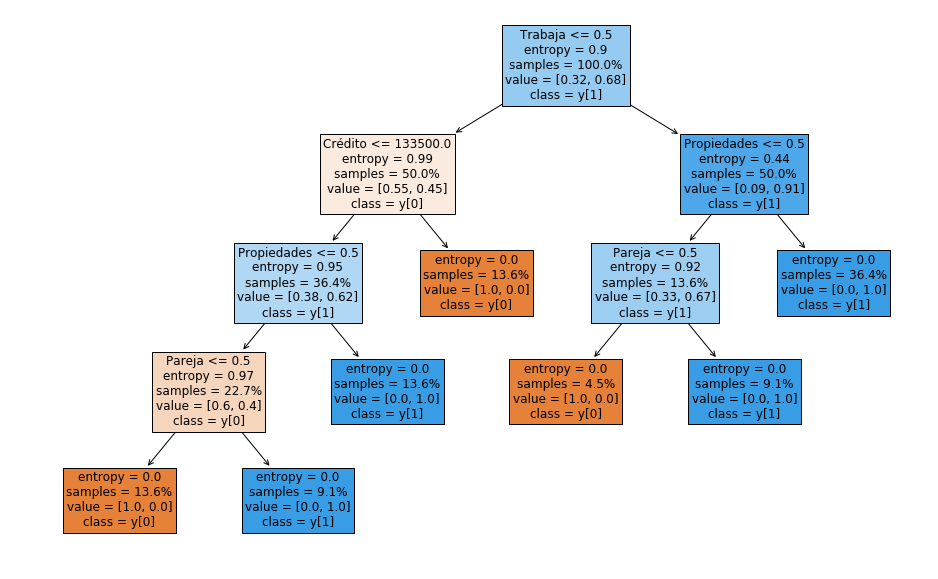

In [10]:
plt.figure(figsize=(16, 10))
plot_tree(dt, 
          filled=True,
          feature_names=list(x_dataset.columns), 
          class_names=True, 
          proportion=True,
          precision=2,
          fontsize=12)

In [12]:
#Cambiamos el criterio de generación del árbol, de entropía a 

dt = DecisionTreeClassifier(criterion="gini")
dt = dt.fit(x_dataset, y_dataset)

[Text(535.6800000000001, 489.24, 'Trabaja <= 0.5\ngini = 0.43\nsamples = 100.0%\nvalue = [0.32, 0.68]\nclass = y[1]'),
 Text(357.12, 380.52000000000004, 'Crédito <= 133500.0\ngini = 0.5\nsamples = 50.0%\nvalue = [0.55, 0.45]\nclass = y[0]'),
 Text(267.84000000000003, 271.8, 'Pareja <= 0.5\ngini = 0.47\nsamples = 36.4%\nvalue = [0.38, 0.62]\nclass = y[1]'),
 Text(178.56, 163.08000000000004, 'Propiedades <= 0.5\ngini = 0.48\nsamples = 22.7%\nvalue = [0.6, 0.4]\nclass = y[0]'),
 Text(89.28, 54.360000000000014, 'gini = 0.0\nsamples = 13.6%\nvalue = [1.0, 0.0]\nclass = y[0]'),
 Text(267.84000000000003, 54.360000000000014, 'gini = 0.0\nsamples = 9.1%\nvalue = [0.0, 1.0]\nclass = y[1]'),
 Text(357.12, 163.08000000000004, 'gini = 0.0\nsamples = 13.6%\nvalue = [0.0, 1.0]\nclass = y[1]'),
 Text(446.4, 271.8, 'gini = 0.0\nsamples = 13.6%\nvalue = [1.0, 0.0]\nclass = y[0]'),
 Text(714.24, 380.52000000000004, 'Propiedades <= 0.5\ngini = 0.17\nsamples = 50.0%\nvalue = [0.09, 0.91]\nclass = y[1]'),
 

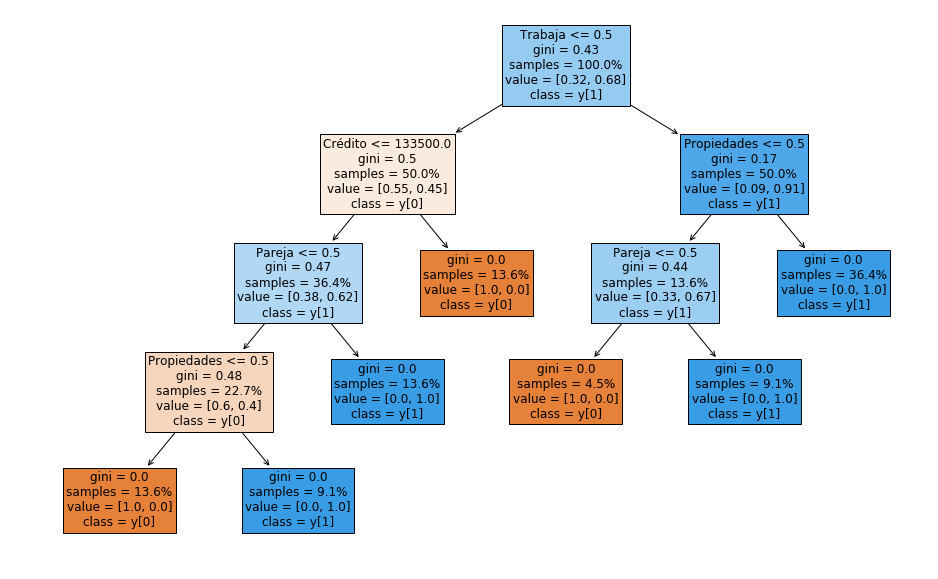

In [13]:
plt.figure(figsize=(16, 10))
plot_tree(dt, 
          filled=True,
          feature_names=list(x_dataset.columns), 
          class_names=True, 
          proportion=True,
          precision=2,
          fontsize=12)